3517

   Po SMOTE
hypotenzia
Pozitívne (1)    2321
Negatívne (0)    2321
Name: count, dtype: int64

 Rozdelenie v testovacej:
hypotenzia
Pozitívne (1)    581
Negatívne (0)    123
Name: count, dtype: int64
🔹 Logistická regresia
    TP: 476,  FP: 61,
    FN: 105,   TN: 62
     Recall:    0.819
     Precision: 0.886
     F1-score:  0.852

🔹 Rozhodovací strom
    TP: 444,  FP: 45,
    FN: 137,   TN: 78
     Recall:    0.764
     Precision: 0.908
     F1-score:  0.830

🔹 Náhodný les
    TP: 537,  FP: 82,
    FN: 44,   TN: 41
     Recall:    0.924
     Precision: 0.868
     F1-score:  0.895

🔹 XGBoost
    TP: 560,  FP: 97,
    FN: 21,   TN: 26
     Recall:    0.964
     Precision: 0.852
     F1-score:  0.905

🔹 MLP
    TP: 501,  FP: 75,
    FN: 80,   TN: 48
     Recall:    0.862
     Precision: 0.870
     F1-score:  0.866

🔹 K-Nearest Neighbors
    TP: 390,  FP: 58,
    FN: 191,   TN: 65
     Recall:    0.671
     Precision: 0.871
     F1-score:  0.758

🔹 SVM
    TP: 481,  FP: 66,
    FN: 10

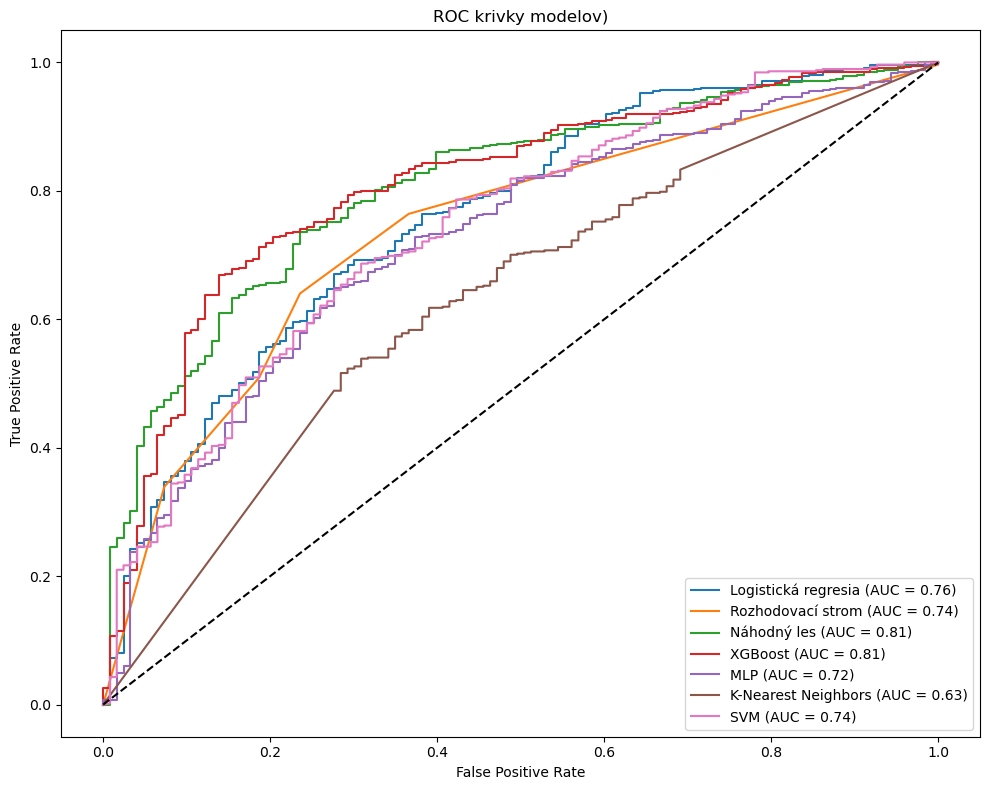

In [1]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Nacitanie dat
df_encoded = pd.read_csv("df_encoded.csv")
print(len(df_encoded))

X = df_encoded.drop(columns=['hypotenzia'])
y = df_encoded['hypotenzia']

# Minmaxscaler
num_cols = X.select_dtypes(include='number').columns.tolist()
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Rozdelenie na trening a test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#  SMOTE 
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


print("\n   Po SMOTE")
print(y_train_bal.value_counts().rename({0: "Negatívne (0)", 1: "Pozitívne (1)"}))

print("\n Rozdelenie v testovacej:")
print(y_test.value_counts().rename({0: "Negatívne (0)", 1: "Pozitívne (1)"}))



#  Modely 
models = {
    'Logistická regresia': LogisticRegression(max_iter=1000, C=1, penalty='l2', solver='liblinear') ,
    'Rozhodovací strom': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3, min_samples_leaf=1, min_samples_split=2),
    'Náhodný les': RandomForestClassifier(n_estimators=165,max_depth=7,min_samples_split=5,random_state=42),
    'XGBoost': XGBClassifier(
        colsample_bytree=0.6, learning_rate=0.01, max_depth=9,
        n_estimators=150, subsample=0.7
    ),
    'MLP': MLPClassifier(max_iter=900,activation='tanh', alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate='constant'),
    'K-Nearest Neighbors': KNeighborsClassifier(metric='manhattan', n_neighbors=3,weights='distance'),
    'SVM': SVC(C=10, probability=True, random_state=42, gamma=0.1, kernel='rbf')
}



plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    y_pred = (y_proba >= 0.4).astype(int)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"🔹 {name}")
    print(f"    TP: {tp},  FP: {fp},\n    FN: {fn},   TN: {tn}")
    print(f"     Recall:    {recall:.3f}")
    print(f"     Precision: {precision:.3f}")
    print(f"     F1-score:  {f1:.3f}\n")

# 8. ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC krivky modelov)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [11]:
missing_values_count = df_encoded.isnull().sum().sum()
missing_values_count

0

Note: you may need to restart the kernel to use updated packages.
🔹 Logistická regresia
     Accuracy:  0.752
     Recall:    0.803
     Precision: 0.886
       F1-score:  0.842
        AUC:       0.735

🔹 Rozhodovací strom
     Accuracy:  0.741
     Recall:    0.761
     Precision: 0.911
       F1-score:  0.829
        AUC:       0.733

🔹 Náhodný les
     Accuracy:  0.811
     Recall:    0.901
     Precision: 0.874
       F1-score:  0.887
        AUC:       0.785

🔹 XGBoost
     Accuracy:  0.820
     Recall:    0.941
     Precision: 0.855
       F1-score:  0.896
        AUC:       0.777



/opt/conda/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


🔹 MLP
     Accuracy:  0.753
     Recall:    0.831
     Precision: 0.864
       F1-score:  0.847
        AUC:       0.682

🔹 K-Nearest Neighbors
     Accuracy:  0.641
     Recall:    0.670
     Precision: 0.866
       F1-score:  0.755
        AUC:       0.605

🔹 SVM
     Accuracy:  0.755
     Recall:    0.822
     Precision: 0.874
       F1-score:  0.847
        AUC:       0.712



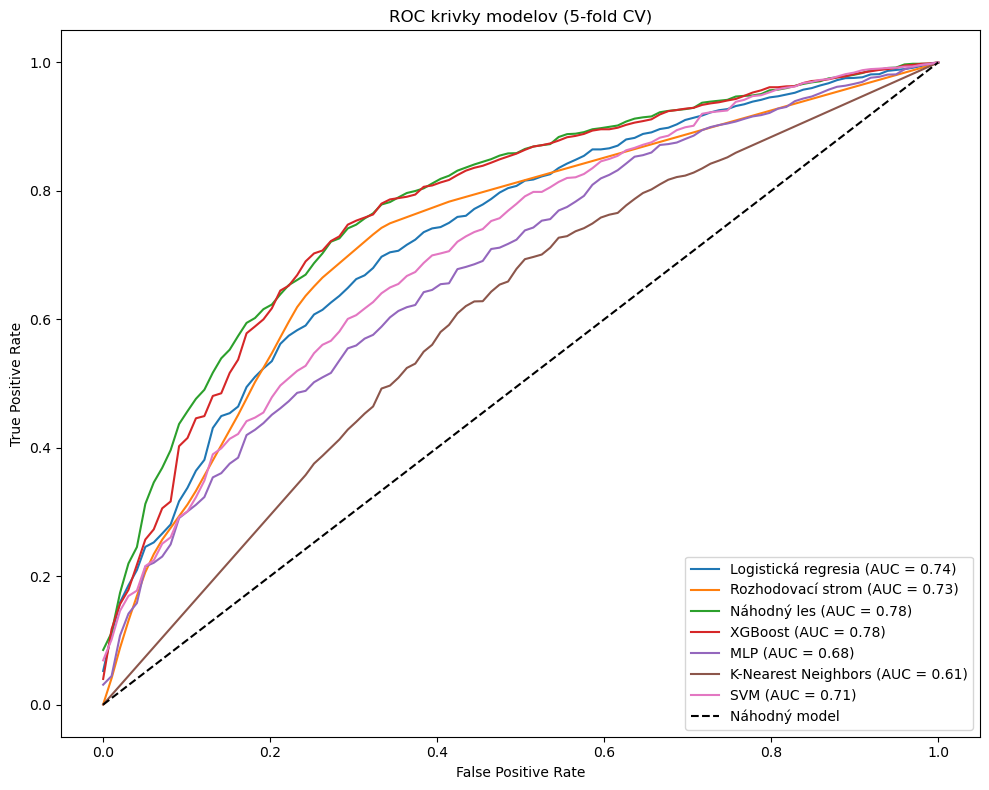

| Model               | Accuracy (μ ± σ)   | Recall (μ ± σ)   | Precision (μ ± σ)   | F1-score (μ ± σ)   | AUC (μ ± σ)   |
|:--------------------|:-------------------|:-----------------|:--------------------|:-------------------|:--------------|
| Logistická regresia | 0.752 ± 0.007      | 0.803 ± 0.012    | 0.886 ± 0.006       | 0.842 ± 0.006      | 0.735 ± 0.008 |
| Rozhodovací strom   | 0.741 ± 0.008      | 0.761 ± 0.010    | 0.911 ± 0.007       | 0.829 ± 0.006      | 0.733 ± 0.015 |
| Náhodný les         | 0.811 ± 0.006      | 0.901 ± 0.011    | 0.874 ± 0.007       | 0.887 ± 0.004      | 0.785 ± 0.018 |
| XGBoost             | 0.820 ± 0.004      | 0.941 ± 0.006    | 0.855 ± 0.006       | 0.896 ± 0.002      | 0.777 ± 0.015 |
| MLP                 | 0.753 ± 0.026      | 0.831 ± 0.035    | 0.864 ± 0.006       | 0.847 ± 0.019      | 0.682 ± 0.017 |
| K-Nearest Neighbors | 0.641 ± 0.011      | 0.670 ± 0.010    | 0.866 ± 0.009       | 0.755 ± 0.008      | 0.605 ± 0.023 |
| SVM           

In [3]:
%pip install tabulate

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    confusion_matrix, recall_score, precision_score, f1_score,
    roc_auc_score, roc_curve, auc,accuracy_score
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  Pipeline + SMOTE
models_pipeline = {
    name: Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    for name, model in models.items()
}

#  5‑fold Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ukladanie metrík 
metrics_summary = {
    name: {'recall': [], 'precision': [], 'f1': [], 'auc': [],'accuracy':[]}
    for name in models_pipeline
}

#  ROC krivky
plt.figure(figsize=(10, 8))


for name, pipeline in models_pipeline.items():
    mean_tpr = np.zeros(100)
    all_fpr = np.linspace(0, 1, 100)

    for train_idx, val_idx in cv.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        pipeline.fit(X_tr, y_tr)
        if hasattr(pipeline.named_steps['model'], "predict_proba"):
            y_proba = pipeline.predict_proba(X_val)[:, 1]
        else:
            y_proba = pipeline.decision_function(X_val)

        y_pred = (y_proba >= 0.4).astype(int)

        #  metriky
        recall    = recall_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        f1        = f1_score(y_val, y_pred)
        auc_      = roc_auc_score(y_val, y_proba)
        accuracy  = accuracy_score(y_val, y_pred)

        # ulozenie hodnot
        metrics_summary[name]['recall'].append(recall)
        metrics_summary[name]['precision'].append(precision)
        metrics_summary[name]['f1'].append(f1)
        metrics_summary[name]['auc'].append(auc_)
        metrics_summary[name]['accuracy'].append(accuracy)

        fpr, tpr, _ = roc_curve(y_val, y_proba)
        mean_tpr  += np.interp(all_fpr, fpr, tpr)

    mean_tpr   /= cv.get_n_splits()
    mean_tpr[-1] = 1.0
    mean_auc   = auc(all_fpr, mean_tpr)

    plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC = {mean_auc:.2f})")
    print(f"🔹 {name}")
    print(f"     Accuracy:  {np.mean(metrics_summary[name]['accuracy']):.3f}")
    print(f"     Recall:    {np.mean(metrics_summary[name]['recall']):.3f}")
    print(f"     Precision: {np.mean(metrics_summary[name]['precision']):.3f}")
    print(f"       F1-score:  {np.mean(metrics_summary[name]['f1']):.3f}")
    print(f"        AUC:       {np.mean(metrics_summary[name]['auc']):.3f}\n")
    

plt.plot([0, 1], [0, 1], 'k--', label='Náhodný model')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC krivky modelov (5‑fold CV)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("aucroc.png")  
plt.show()


#      Tabuľka s  odchylkou μ ± σ pre každú metriku

rows = []
for model, vals in metrics_summary.items():
    rows.append({
        'Model': model,
        'Accuracy (μ ± σ)': f"{np.mean(vals['accuracy']):.3f} ± {np.std(vals['accuracy']):.3f}",
        'Recall (μ ± σ)':    f"{np.mean(vals['recall']):.3f} ± {np.std(vals['recall']):.3f}",
        'Precision (μ ± σ)': f"{np.mean(vals['precision']):.3f} ± {np.std(vals['precision']):.3f}",
        'F1-score (μ ± σ)':  f"{np.mean(vals['f1']):.3f} ± {np.std(vals['f1']):.3f}",
        'AUC (μ ± σ)':       f"{np.mean(vals['auc']):.3f} ± {np.std(vals['auc']):.3f}",
    })

df_summary = pd.DataFrame(rows).set_index('Model')

excel_filename = "model_metrics_summary.xlsx"
df_summary.to_excel(excel_filename)

print(df_summary.to_markdown())


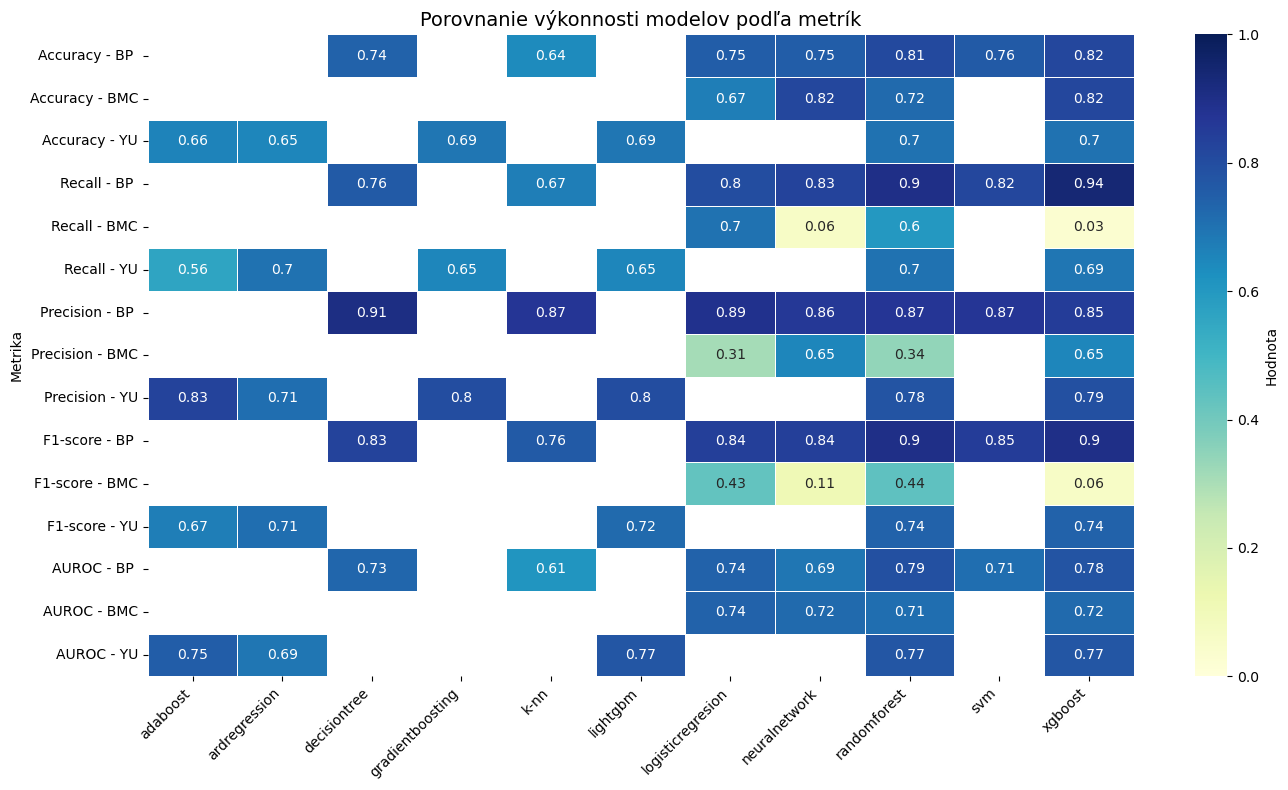

In [6]:
# heatmapa pre porovnanie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "transposed_model_metrics.xlsx"  
df = pd.read_excel(file_path)

# Nastavenie prveho stlpca ako index 
df = df.rename(columns={df.columns[0]: "Metrika"})
df.set_index("Metrika", inplace=True)

# Nahradenie 'X' za NaN 
df_cleaned = df.replace("X", pd.NA)
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

#  heatmapa
plt.figure(figsize=(14, 8))
sns.heatmap(df_cleaned, annot=True, cmap="YlGnBu", linewidths=0.5,
            cbar_kws={'label': 'Hodnota'}, vmin=0, vmax=1)


plt.title("Porovnanie výkonnosti modelov podľa metrík", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Zobrazenie a ulozenie
plt.savefig("heatmap_model_metrics.png")  
plt.show()


In [7]:
git remote add origin https://github.com/kkuichi/ps376ip.git
git branch -M main
git push -u origin main

SyntaxError: invalid syntax (1667668403.py, line 1)